In [17]:
import pandas as pd
import sys
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import scipy
from scipy import linalg 


import os 
from collections import defaultdict 
from statsmodels.multivariate.manova import MANOVA 




Q1(a).

In [2]:
X = np.zeros((400, 2576))
for i in range(0, 40):
    for j in range(0, 10):
        image = Image.open('E:\course\資料分析\Homework\HW2\ORL Faces\%s_%s.png'%(i+1,j+1))
        image_array = array(image) #56*46
        X[j+i*10] = image_array.flatten() #400*2576
        y = [10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[0],10*[1],10*[0]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]]
            
y = list(_flatten(y))

MSE :  1.7945291868170502e-08


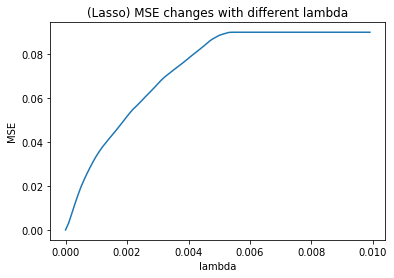

In [3]:
mse = []
x_axis = []
best = sys.maxsize
for i in range(0,100):
    lasso = Lasso(alpha = i/10000,normalize = True)
    lasso.fit(X, y)
    mse.append(np.mean((lasso.predict(X) - y) ** 2)) 
    temp = np.mean((lasso.predict(X) - y) ** 2)
    x_axis.append(i/10000)
    if(temp<best):
        best = temp
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("(Lasso) MSE changes with different lambda")
plt.plot(x_axis,mse)
print("MSE : " ,best)

MSE :  1.3069976900193986e-29


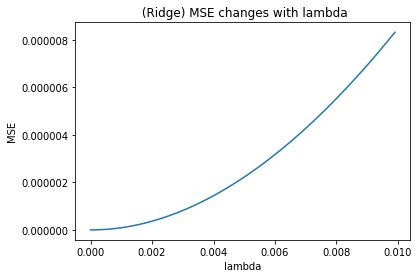

In [4]:
mse = []
x_axis = []
best2 = sys.maxsize
for i in range(0,100):
    ridge = Ridge(alpha = i/10000,normalize = True)
    ridge.fit(X, y)
    mse.append(np.mean((ridge.predict(X) - y) ** 2)) 
    temp2 = np.mean((ridge.predict(X) - y) ** 2)
    x_axis.append(i/10000)
    if(temp2<best2):
        best2 = temp2
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title(" (Ridge) MSE changes with lambda")
plt.plot(x_axis,mse)
print("MSE : " ,best2)

Q1(b).

In [5]:
lasso = Lasso(alpha = 0.001,normalize = True)
lasso.fit(X, y)
n = np.sum(lasso.coef_ != 0)
print('Lasso回歸後選定的像素點：' + str(n)+"個")

important_pixels = []
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        important_pixels.append(i)

Lasso回歸後選定的像素點：52個


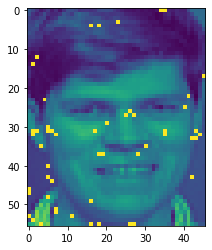

In [6]:
image = Image.open(r'E:\course\資料分析\Homework\HW2\ORL Faces\33_5.png')
img_array = np.array(image)
#print(len(important_pixels),"important pixels at")
for i in range(0, len(important_pixels)): #math.floor()
    col = math.floor(important_pixels[i]/46)
    row = important_pixels[i]-46*col
    #print("(",col,",", row,")")    
    img_array[int(col)][int(row)]=255
plt.imshow(img_array, interpolation='nearest')
plt.show()

Q2

In [7]:
data = pd.read_csv(r"E:\course\資料分析\Homework\hw5\BANK.csv")
y = data.loc[:,"Value Added"]
X = data.loc[:,["Capital","Labor"]]
X_Labor = X.loc[:,"Labor"].to_numpy()
X_Capital = X.loc[:,"Capital"].to_numpy()
X_LOG = np.log(data[["Capital","Labor"]].values)
y_LOG = np.log(data["Value Added"].values)
reg = LinearRegression().fit(X_LOG, y_LOG)
print(f"beta1:\t{reg.coef_[0]}")
print(f"beta2:\t{reg.coef_[1]}")

beta1:	0.5056509223985458
beta2:	0.8454644447654768


In [8]:
X_Labor = X.loc[:,"Labor"].to_numpy()
X_Capital = X.loc[:,"Capital"].to_numpy()
def Cobb_Douglas(B1):
    return np.sum( ((X_Capital * B1 + X_Labor * (1-B1)) - y) ** 2 )
res = scipy.optimize.minimize(Cobb_Douglas, x0 = 0)
print('under constrain that Beta1 + Beta2 = 1\nestimate: Beta1 = ', res.x[0], ', and Beta2 =', (1- res.x[0]))

under constrain that Beta1 + Beta2 = 1
estimate: Beta1 =  3.7161686266426086 , and Beta2 = -2.7161686266426086


Q3

In [18]:
class PCA(): 
    def fit(self,X,isCorrMX=False,rowvar=True):       
        self.X = X         
        #Centralization  
        self.Z =  X-np.mean(X, axis=1).reshape(X.shape[0],1)    
        
        S = np.corrcoef(self.Z) if isCorrMX else np.cov(self.Z)  
        eigvals, eigvecs = linalg.eig(S) 
        self.eigvals = eigvals.real 
        self.eigvecs = eigvecs.real 
        self.components = self.eigvecs.T@self.X 
        
    
    def draw_scree_plot(self):
        num_vars = self.X.shape[0] 
        tot_var = self.eigvals.sum() 
        eigvals_ratio = self.eigvals/tot_var 
         
        plt.figure(figsize=(8,5)) 
        sing_vals = np.arange(num_vars) + 1 
        cumulative_eigvals = np.cumsum(eigvals_ratio)  
        plt.plot(sing_vals, cumulative_eigvals, 'ro-', linewidth=2) 
        plt.bar(sing_vals,eigvals_ratio) 
        plt.title('Scree Plot') 
        plt.xlabel('Principal Component') 
        plt.ylabel('Cumulative Percentage')
  
                      



In [19]:
# read dataset 
df = pd.read_csv(r"E:\course\資料分析\Homework\hw5\auto-mpg.data.csv") 
df.columns = df.columns.str.strip()
df=df.astype(float)
df.isnull().sum()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


==========loading matrix==========
[[-7.59590581e-03 -1.75785097e-02 -4.19212264e-02  8.31000630e-01
   5.49535507e-01  5.61451547e-02 -3.97118180e-02  2.43984110e-02]
 [ 1.79257460e-03  1.33223878e-02 -7.28065126e-03 -4.31502411e-03
  -9.17751826e-03  1.53912563e-02  3.75218753e-01  9.26626917e-01]
 [ 1.14338202e-01  9.45572572e-01 -3.03873075e-01  9.22239231e-03
  -3.41321063e-03 -1.06909276e-02  9.19061696e-04 -1.63889805e-02]
 [ 3.89660894e-02  2.98328518e-01  9.47540130e-01  6.34424404e-02
  -5.73169239e-03 -8.63249865e-02 -8.51000586e-03  8.19890724e-03]
 [ 9.92644743e-01 -1.20867105e-01 -2.65874637e-03  3.53993832e-03
   3.93041220e-03  3.52931159e-03 -1.85727735e-04 -1.31438408e-04]
 [-1.35281211e-03 -3.48299933e-02 -7.68839939e-02 -2.08463123e-02
   1.25527681e-01 -9.88134411e-01  9.09879495e-03  1.37739900e-02]
 [-1.33689886e-03 -2.39497354e-02 -4.41269251e-02  5.51778482e-01
  -8.24191632e-01 -1.12006207e-01  3.03888666e-02 -1.60382361e-02]
 [-5.51527155e-04 -3.24675463e-03 

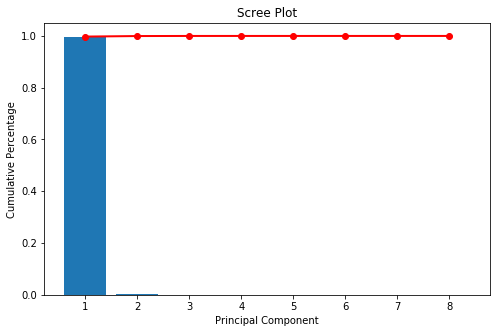

In [20]:
X = df.values.T 

pca = PCA() 
pca.fit(X) 
print("==========loading matrix==========") 
print(pca.eigvecs) 
print() 
print("==========eigenvalue value vector==========") 
print(pca.eigvals) 
print() 
print("==========the score matrix==========") 
print(pca.components) 

pca.draw_scree_plot() 


==========loading matrix==========
[[-0.38586239  0.07663269  0.29228579  0.09998251 -0.74036644 -0.38735165
   0.1151321   0.19588516]
 [ 0.4023885   0.13842878  0.07223935 -0.21603551 -0.48261485  0.53092548
   0.41774679 -0.27878265]
 [ 0.41644435  0.12632499  0.07423622 -0.13581398 -0.30331627  0.00699705
  -0.82916553  0.08422855]
 [ 0.40183594 -0.11148007  0.23605571 -0.11971643  0.08426839 -0.6667096
   0.13477548 -0.53504996]
 [ 0.40157579  0.21102    -0.00089399 -0.32246785  0.13127292 -0.23585961
   0.30991105  0.72202073]
 [-0.2647309   0.41690206 -0.63943514 -0.49280794 -0.09773197 -0.20293343
  -0.03518826 -0.22891382]
 [-0.21386777  0.6904632   0.5871892  -0.10601968  0.30134385  0.11002592
  -0.0542884  -0.12501506]
 [-0.27786815 -0.50150064  0.30732382 -0.74328281  0.04739508  0.12086663
  -0.07951102  0.0345266 ]]

==========eigenvalue value vector==========
[5.3758723  0.94366326 0.81164365 0.48615594 0.18282657 0.11432193
 0.03196954 0.05354682]

==========the score 

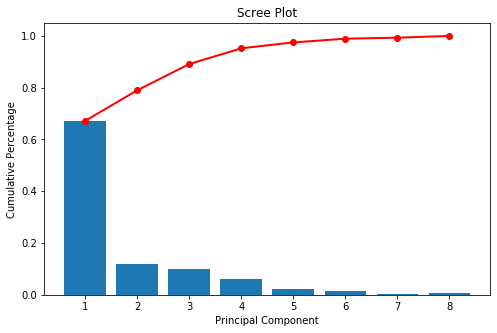

In [21]:
X = df.values.T 

pca = PCA() 
pca.fit(X,isCorrMX=True) 
print("==========loading matrix==========") 
print(pca.eigvecs) 
print() 
print("==========eigenvalue value vector==========") 
print(pca.eigvals) 
print() 
print("==========the score matrix==========") 
print(pca.components) 

pca.draw_scree_plot()


Two results are very different between covariance and correlation methods so we can conclude that PCA is not scale-invariant

Q4

X shape:	(2576, 400)


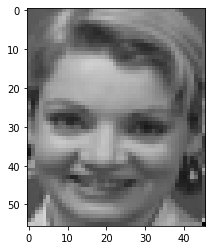

In [23]:
df = pd.read_csv(r"E:\course\資料分析\Homework\hw5\all.csv") 
X = df.iloc[:,1:].values 
X = X.T 

print(f"X shape:\t{X.shape}") 
plt.imshow(X[:,0].reshape(56,46), cmap='gray', vmin=0, vmax=255)

In [24]:
pca = PCA() 
pca.fit(X.T) 

tot_var = pca.eigvals.sum() 
eigvals_ratio = pca.eigvals/tot_var 
    
percentage_list = [0.5,0.6,0.7,0.8,0.9] 
cum_explained_var_ratio = np.cumsum(eigvals_ratio)    
j = 0 
for i,ratio in enumerate(cum_explained_var_ratio): 
    if j>len(percentage_list)-1:break 
    if(ratio>=percentage_list[j]): 
        print(f"{int(percentage_list[j]*100)}%: {i+1} is needed.") 
        j += 1 

50%: 2 is needed.
60%: 3 is needed.
70%: 6 is needed.
80%: 15 is needed.
90%: 47 is needed.


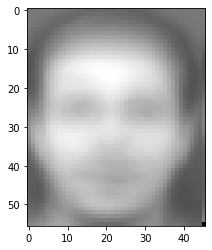

In [25]:
first_component = pca.components[0] 
min_ = first_component.min() 
max_ = first_component.max() 
rescale = lambda x:(x-min_)*255/(max_-min_) 
first_component = np.apply_along_axis(rescale,0,first_component)  
plt.imshow(first_component.reshape(56,46), cmap='gray', vmin=0, vmax=255)